# 10. 데크(Deque), 우선순위 큐(PriorityQ)


## 데크
데크(Deque)는 더블 엔디드 큐의 줄임말로, 글자 그대로 양쪽 끝을 모두 추출할 수 있는, 큐를 일반화한 형태의 추상 자료형(ADT)이다.

데크는 양쪽에서 삭제와 삽입을 모두 처리할 수 있으며, 스택과 큐의 특징을 모두 갖고 있다. 이 추상 자료형의 구현은 배열이나 연결 리스트 모두 가능하지만, 특별히 다음과 같이 이중 연결 리스트로 구현하는 편이 가장 잘 어울인다.


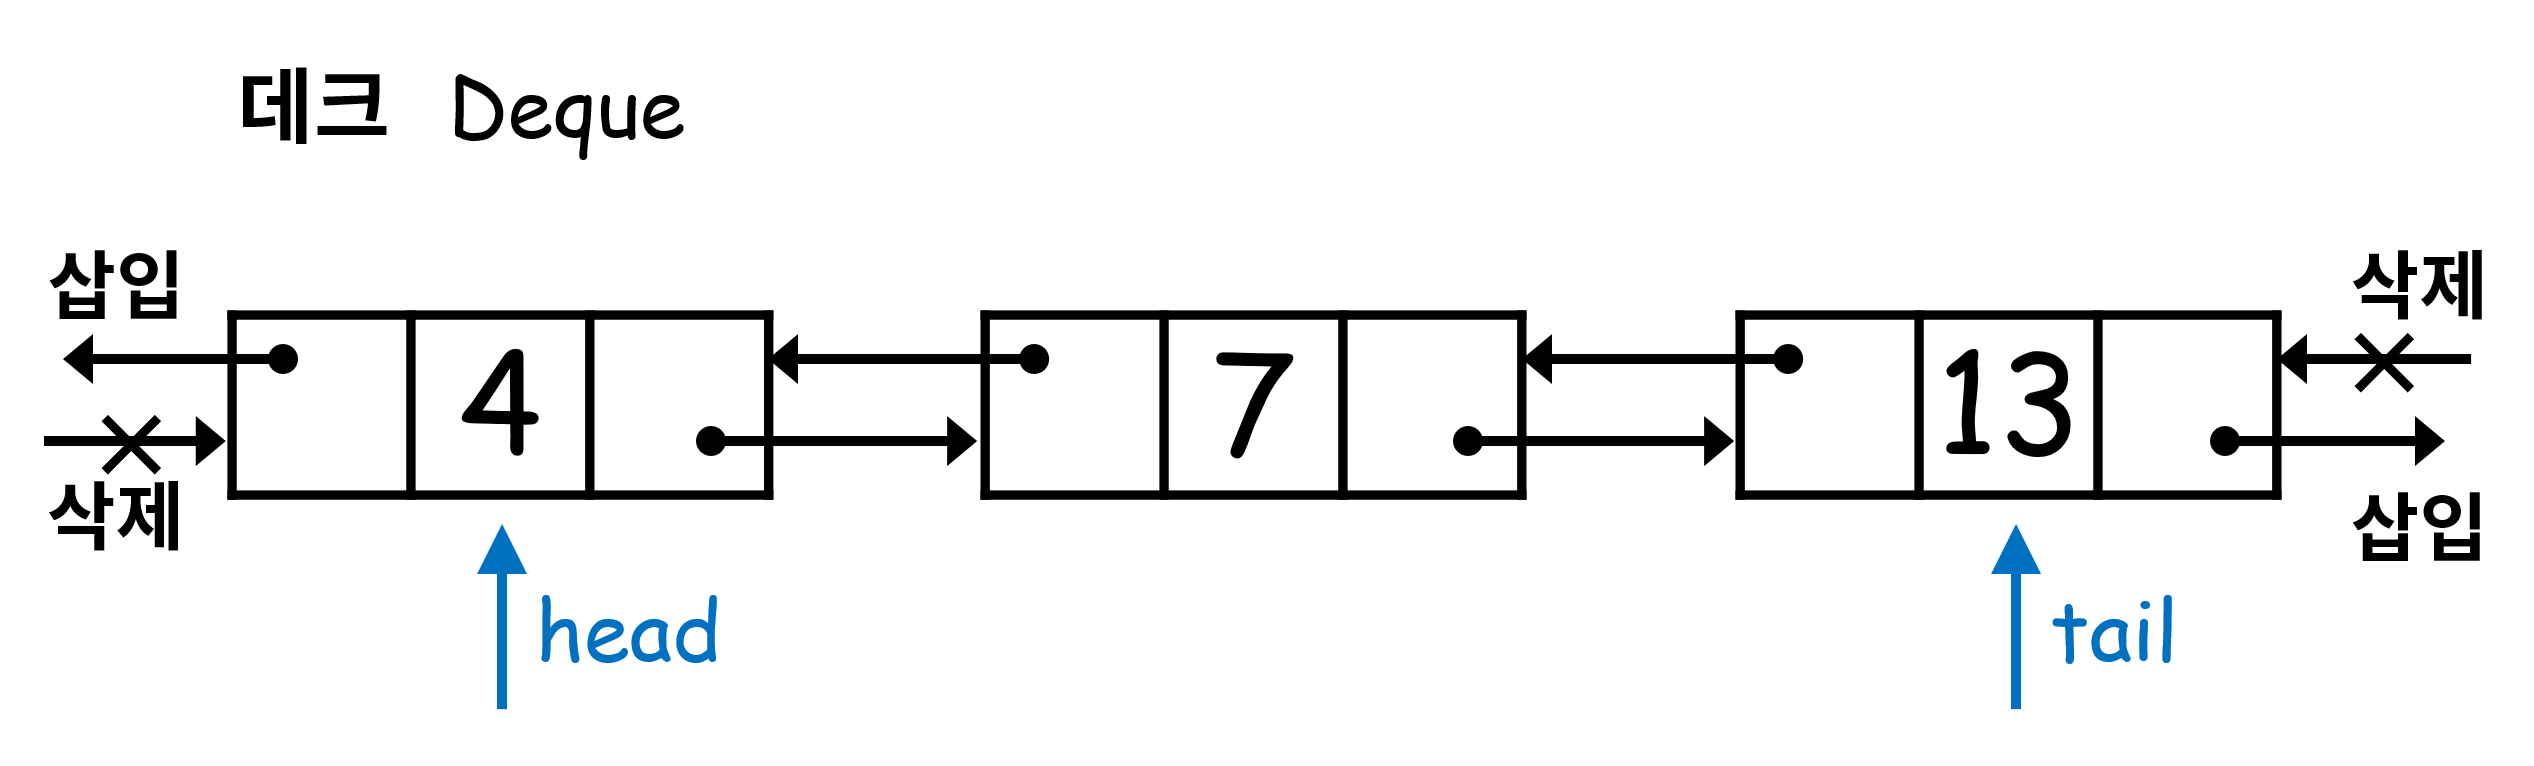
이중 연결 리스트로 구현하게 되면, 양쪽으로 head와 tail이라는 이름의 두 포인터를 갖고 았다가 새로운 아이템이 추가될 때마다 앞쪽 또는 뒤쪽으로 연결 시켜 주기만 하면 된다. 당연히 연결 후에는 포인터를 이동하면 된다.

파이썬은 데크 자료형을 다음과 같이 collecions 모듈에서 deque라는 이름으로 지원한다. 



In [48]:
import collections
d = collections.deque()
type(d)

collections.deque

## 26 원형 데크 디자인

Q1. 다음 연산을 제공하는 원형 데크를 디자인 하라

- MyCircularDeque(k): 데크 사이즈를 k로 지정하는 생성자다.
- insertFront(): 데크 처음에 아이템을 추가하고 성공할 경우 true를 리턴한다.
- insertLast(): 데크 마지막에 아이템을 추가하고 성공할 경우 true를 리턴한다.
- deleteFront(): 데크 처음에 아이템을 삭제하고 성공할 경우 true를 리턴한다.
- deleteLast(): 데크 마지막에 아이템을 삭제하고 성공할 경우 true를 리턴한다.
- getFront(): 데크의 첫 번쨰 아이템을 가져온다. 데크가 비어 있다면 -1을 리턴한다.
- getRear(): 데크의 마지막 아이템을 가져온다. 데크가 비어 있다면 -1을 리턴한다.
- isEmpty(): 데크가 비어 있는지 여부를 판별한다.
- isFull(): 데크가 가득 차 있는지 여부를 판별한다.

In [117]:
class ListNode:
    def __init__(self, x): #__init__() : 초기화 함수
        self.val = x  #결과값을 x로 지정
        self.next = None
    

class MyCircularDeque:
  def __init__(self, k: int):  #__init__() : 초기화 함수
    self.head, self.tail = ListNode(None), ListNode(None)
    self.k, self.len = k, 0  #최대 길이를 k로 설정 현재 길이를 0으로 설정
    self.head.right, self.tail.left = self.tail, self.head




  # 이중 연결 리스트에 신규 노드 삽입
  def _add(self, node: ListNode, new: ListNode): #PEP 8 규칙에 따라 _add()
    n = node.right
    node.right = new
    new.left, new.right =node, n
    n.left = new

 # 이중 연결 리스트에 신규 노드 삭제
  def _del(self, node: ListNode):
    n = node.right.right
    node.right = n
    n.left = node


  def insertFront(self, value: int) -> bool:
    if self.len == self.k: # (k)최대 길이
        return False 
    self.len += 1
    self._add(self.head, ListNode(value))
    return True


  def insertLast(self, value: int) -> bool:
    if self.len == self.k:
        return False
    self._add(self.tail.left,ListNode(value))
    return True


  def deleteFront(self) -> bool:
    if self.len == 0:
        return False
    self.len -= 1
    self._del(self.head)
    return True
 
 
  def deleteLast(self) -> bool:
    if self.len == 0:
        return False
    self.len -= 1
    self._del(self.tail.left.left)
    return True


  def getFront(self) -> int:
    return self.head.right.val if self.len else -1



  def getRear(self) -> int:
    return self.tail.left.val if self.len else -1


  def isEmpty(self) -> bool:
    return self.len == 0
       
        
  def isFull(self) -> bool:
    return self.len == self.k

if __name__ == '__main__':
  d = MyCircularDeque(3)
  print(d.insertFront(1))
  print(d.insertLast(2))
  print(d.deleteFront())
  print(d.deleteLast())
  print(d.getFront())
  print(d.getRear())
  print(d.isEmpty())
  print(d.isFull())

  

True
True
True
False
-1
-1
True
False


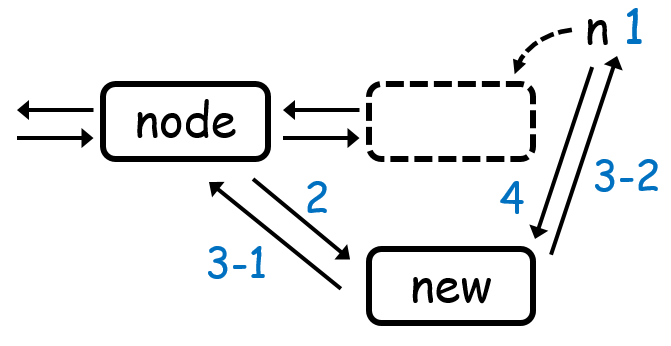

## 우선순위 큐

우선순위 큐는 큐 또는 스택과 같은 추상 자료형과 유사하지만 추가로 각 요소의 '우선순위'와 연관되어 있다.

- 스택: 가장 나중에 삽입된 요소를 먼저 추출 
- 큐: 가장 먼저 삽입된 요소를 먼저 추출한다. 
- 우선순위 큐: 어떠한 특정 조건에 따라 우선순위가 가장 높은 요소가 추출되는 자료형이다. <br>
대표적으로 최댓값 추출을 들 수 있는데, 예를 들어 큐에 [1, 4, 5, 3, 2]가 들어 있고 최댓값을 추출하는 우선순위 큐가 있다고 가정하자, 이 경우 항상 남아 있는 요소들의 최대값이 우선순위에 따라 추출되어 5, 4, 3, 2, 1 순으로 추출된다.

## 27 k개 정렬 리스트 병합

Q1.k개의 정렬된 리스트를 1개의 정렬된 리스트로 병합하라

- 입력 
```
[
  1->4->5,
  1->3->4,
  2->6
]
```
- 출력
```
1->1->2->3->4->4->5->6
```

- 설명<br>
여기서 k는 3이다

In [113]:
import heapq
from typing import List


# 단일 연결 목록에 대한 정의
class ListNode:
    def __init__(self, x): #__init__() : 초기화 함수
        self.val = x
        self.next = None


class Solution:
    def mergeKLists(self, lists: List[ListNode]) -> ListNode:
        root = result = ListNode(None)
        heap = []


        # 각 연결 리스트의 루트를 힙에 저장
        for i in range(len(lists)):
            if lists[i]:
                heapq.heappush(heap, (lists[i].val, i, lists[i]))

        # 힙 추출 이후 다음 노드는 다시 저장
        while heap:
            node = heapq.heappop(heap)
            idx = node[1]
            result.next = node[2]

            result = result.next
            if result.next:
                heapq.heappush(heap, (result.next.val, idx, result.next))

        return root.next

s = Solution()
l1 = ListNode(1)
l1.next = ListNode(4)
l1.next.next = ListNode(5)

l2 = ListNode(1)
l2.next = ListNode(3)
l2.next.next = ListNode(4)

l3 = ListNode(2)
l3.next = ListNode(6)
answer = s.mergeKLists([l1,l2,l3])
while answer is not None: # None에서 멈춤
  print(f'{answer.val}', end=" ") # f'{}' f-string는 문자열 포매팅
  answer = answer.next # 다음숫자 불러온다 

1 1 2 3 4 4 5 6 